In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
kelli_data = pd.read_csv('../Data/Cleaned/sanitized_property_listings_Kelli_final.csv')
final_data = kelli_data[kelli_data['Price'] < 1000000]

print(final_data.columns)


# Display the first 10 rows of the dataset
final_data.head(50)

# Get counts of unique values for building condition and property type
condition_counts = final_data['Building condition'].value_counts()
property_counts = final_data['Property type'].value_counts()

# Print the counts if needed for inspection

# print("Building Condition Counts:\n", condition_counts)

# print("Property Type Counts:\n", property_counts)

# Initialize the LabelEncoder
label_encoder_property_type = LabelEncoder()
label_encoder_condition = LabelEncoder()

# Fit and transform on the original data
final_data['Encoded Property Type'] = label_encoder_property_type.fit_transform(final_data['Property type'])
final_data['Encoded Building Condition'] = label_encoder_condition.fit_transform(final_data['Building condition'])

# Show the updated DataFrame with encoded columns
print(final_data[['Property type', 'Encoded Property Type', 'Building condition', 'Encoded Building Condition']].head(50))

original_conditions = label_encoder_condition.inverse_transform(final_data['Encoded Building Condition'])
print(original_conditions)
original_types = label_encoder_property_type.inverse_transform(final_data['Encoded Property Type'])
print(original_types)

Index(['Unnamed: 0', 'Property ID', 'Locality data', 'Price', 'Property type',
       'Number of bedrooms', 'Living area m²', 'Equipped kitchen', 'Furnished',
       'Open fire', 'Terrace surface m²', 'Garden area m²', 'Swimming pool',
       'Building condition'],
      dtype='object')
   Property type  Encoded Property Type Building condition  \
0          house                      1        To renovate   
1          house                      1      To be done up   
2          house                      1             As new   
3          house                      1        To renovate   
4          house                      1        To renovate   
5          house                      1               Good   
6          house                      1     Just renovated   
7          house                      1      To be done up   
8          house                      1             As new   
9          house                      1               Good   
10         house              

C:\Users\becod\AppData\Local\Temp\ipykernel_2268\726970712.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Encoded Property Type'] = label_encoder_property_type.fit_transform(final_data['Property type'])
C:\Users\becod\AppData\Local\Temp\ipykernel_2268\726970712.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Encoded Building Condition'] = label_encoder_condition.fit_transform(final_data['Building condition'])


In [7]:
"""
calculate the outliers with a function, this was useless work on my part apparently

"""

final_data.head(10)

living_area = final_data['Living area m²']
terrace_surface = final_data['Terrace surface m²']
garden_area = final_data['Garden area m²']

print(living_area.describe())
print(terrace_surface.describe())
print(garden_area.describe())

def detect_outliers_iqr(df, column):
    """
    This function detects outliers in a specified column of a pandas DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze
    column (str): The column name to check for outliers
    
    Returns:
    pd.Series: A boolean Series indicating whether each value is an outlier
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the specified column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    return outliers

outliers_living_area = (detect_outliers_iqr(final_data, ['Living area m²']))
outliers_terrace_surface = (detect_outliers_iqr(final_data, ['Terrace surface m²']))
outliers_garden_area = (detect_outliers_iqr(final_data, ['Garden area m²']))

print(detect_outliers_iqr(final_data, ['Living area m²']))
print(detect_outliers_iqr(final_data, ['Terrace surface m²']))
print(detect_outliers_iqr(final_data, ['Garden area m²']))






count    8356.000000
mean      148.516395
std        90.296907
min        16.000000
25%        90.000000
50%       127.500000
75%       180.000000
max      1439.000000
Name: Living area m², dtype: float64
count    4087.000000
mean       24.044287
std        70.999733
min         1.000000
25%         8.000000
50%        15.000000
75%        28.000000
max      3749.000000
Name: Terrace surface m², dtype: float64
count     2388.000000
mean       516.314070
std       1240.924127
min          1.000000
25%         75.750000
50%        195.000000
75%        531.250000
max      35000.000000
Name: Garden area m², dtype: float64
      Living area m²
0              False
1              False
2              False
3              False
4              False
...              ...
9028           False
9029           False
9030           False
9031           False
9032           False

[8356 rows x 1 columns]
      Terrace surface m²
0                  False
1                  False
2                  Fa

Outliers:
[0       False
1       False
2       False
3       False
4       False
        ...  
9028    False
9029    False
9030    False
9031    False
9032    False
Name: Living area m², Length: 8356, dtype: bool]


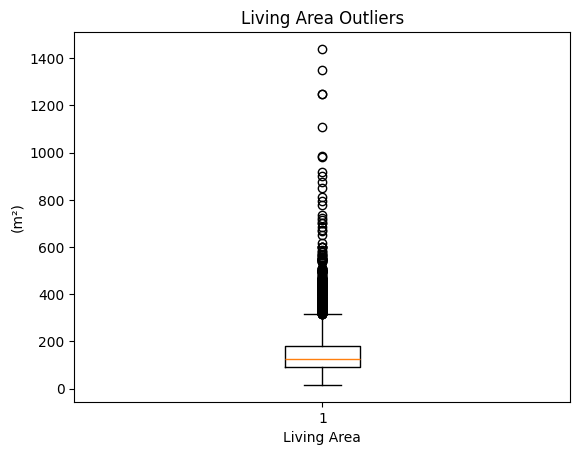

In [8]:
"""
creating the boxplots for the outliers - living area

"""


# Create boxplot

fig, ax = plt.subplots()
ax.boxplot(living_area)

 # Set title and labels
ax.set_title('Living Area Outliers')
ax.set_xlabel('Living Area')
ax.set_ylabel('(m²)')

# Calculate and print outliers
q1 = np.percentile(living_area, 25)
q3 = np.percentile(living_area, 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = [(living_area < lower_bound) | (living_area > upper_bound)]

# Output results
print("Outliers:")
print(outliers)

# Show the plot
plt.show()


Outliers:
[  80.   85.   75.  100.  227.   71.   67.  120.  120.   90.   60.   80.
   90.  120.   75.   70.  100.   90.   95.   95.   60.   61.   75.   60.
  124.   75.   65.   70.   60.  100.  150.   80.   75.   75.   64.   80.
   60.  106.  100. 1606.  220.   80.   67.   68.   72.   60.   60.   66.
   60.   60.   67.   67.   76.   80.   60.  120.   60.   65.  133.   60.
   80.   60.   60.   60.   74.   81.   70.   98.   60.   60.  443.   76.
   80.  125.  219.  100.   65.   60.   64.   80.   67.  120.   80.   70.
   60.   75.  165.   60.   60.  150.  200.   70.   70.   60.   80.   65.
   98.  118.   90.  100.   70.  130.  108.  100.   80.   62.   60.   60.
   88.  120.   71.   80.   91.  215.  215.   70.  190.   92.  136.   70.
   72.   60.   60.   75.  150.  115.   68.  150.   60.   80.   60.  300.
  121.  121.   90.   59.   90.  835.   86.  100.  150.  140.  100.   83.
   66.   80.  104.   67.   64.   77.   63.  100.   60.   60.   61.   70.
 1000.   60.  105.   65.  130.  120.   70

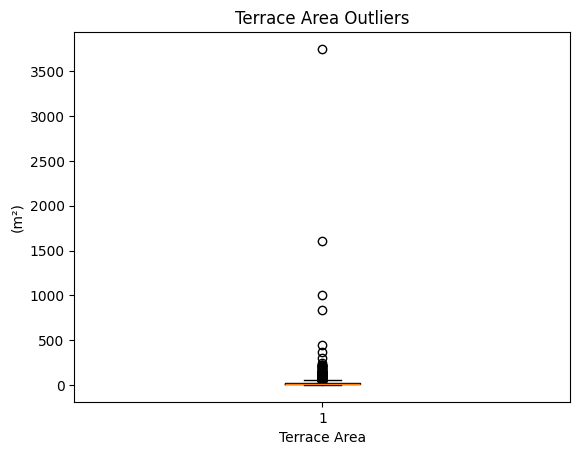

In [9]:


# Create boxplot

terrace_surface_cleaned = final_data.dropna(subset= ['Terrace surface m²'], axis=0, inplace=False)


fig, ax = plt.subplots()
ax.boxplot(terrace_surface_cleaned['Terrace surface m²'])

 # Set title and labels
ax.set_title('Terrace Area Outliers')
ax.set_xlabel('Terrace Area')
ax.set_ylabel('(m²)')

# Calculate and print outliers
q1 = final_data['Terrace surface m²'].quantile(0.25)
q3 = final_data['Terrace surface m²'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = final_data['Terrace surface m²'][(final_data['Terrace surface m²'] < lower_bound) | (final_data['Terrace surface m²'] > upper_bound)]

# Output results
print("Outliers:")
print(outliers.values)

# Show the plot
plt.show()

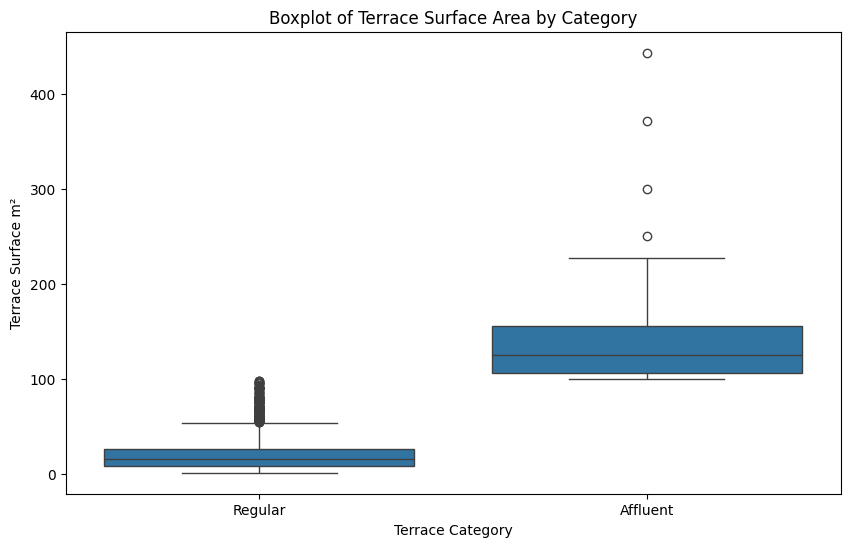

In [48]:
# final_data.head(20)
# df_rediculousterrace = terrace_surface_cleaned.sort_values(by='Terrace surface m²', ascending=False)
# print(df_rediculousterrace)

''' 
Terrace surface subcategories

'''

import seaborn as sns

bins = [0, 100, 500]
labels = ['Regular', 'Affluent']

# Categorize the terrace area
terrace_surface_cleaned.loc[:, 'Terrace_Category'] = pd.cut(terrace_surface_cleaned['Terrace surface m²'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=terrace_surface_cleaned, x='Terrace_Category', y='Terrace surface m²')
plt.title('Boxplot of Terrace Surface Area by Category')
plt.xlabel('Terrace Category')
plt.ylabel('Terrace Surface m²')
plt.show()


